In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

## Load Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Analyze Data

In [3]:
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


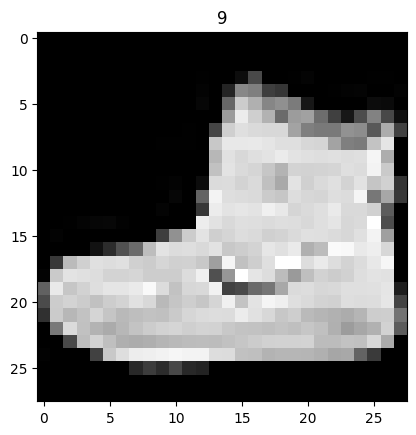

In [4]:
plt.title(y_train[0])
plt.imshow(x_train[0], cmap="gray")


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

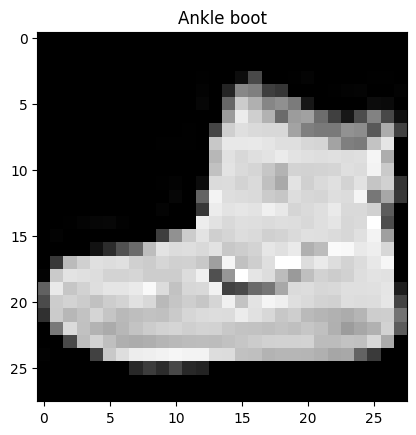

In [7]:
plt.title(labels[y_train[0]])
plt.imshow(x_train[0], cmap="gray")



## Numericize the Data

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# CNN requires N x H x W x C
# We're missing C as this is a greyscale image, so let's add it in
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


## Build Model using Functional API

**Conv2D Arguments:**

> Conv2D(#_feature_maps, filter_dimensions, stride_length, activation, padding)

>> Default padding = 'valid'

>> Padding options: 'valid', 'same', 'full'

>> A stride of 2 cuts the image size in half

>> **Important:** Increase the number of feature maps each layer

**Flatten:** Creates the *Feature Vector* from the output

In [11]:
# Create one or more inputs
i = Input(shape=x_train[0].shape) # Create the Input Layer

# Create one or more branches
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i) # Create Conv2D Layer A that receives the output of the input layer
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) # Create Conv2D Layer B that receives the output of Conv2D Layer A
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) # Create Conv2D Layer C that receives the output of Conv2D Layer B
x = Flatten()(x) # Create Flatten Layer that receives the output of Conv2D Layer C
x = Dropout(0.2)(x) # Create Dropout Layer that receives the output the Flatten Layer
x = Dense(512, activation='relu')(x) # Create Dense Layer that receives the output of Dropout Layer
x = Dropout(0.2)(x) # Create Dropout Layer that receives the output of Dense Layer
x = Dense(K, activation='softmax')(x) # Create Dense Layer that receives the output of Dropout Layer

# Create the model from the input(s) and branch(es)
model = Model(i, x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656

In [12]:
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 19s 4ms/step - loss: 0.5255 - accuracy: 0.8057 - val_loss: 0.3989 - val_accuracy: 0.8508
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3629 - accuracy: 0.8643 - val_loss: 0.3469 - val_accuracy: 0.8715
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3144 - accuracy: 0.8806 - val_loss: 0.3167 - val_accuracy: 0.8820
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2818 - accuracy: 0.8933 - val_loss: 0.3256 - val_accuracy: 0.8825
Epoch 5/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2573 - accuracy: 0.9028 - val_loss: 0.3062 - val_accuracy: 0.8868
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2352 - accuracy: 0.9110 - val_loss: 0.2970 - val_accuracy: 0.8918
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2156 - accuracy: 0.9185 - val_loss: 0.3046 - val_accuracy

## Analyze the Model



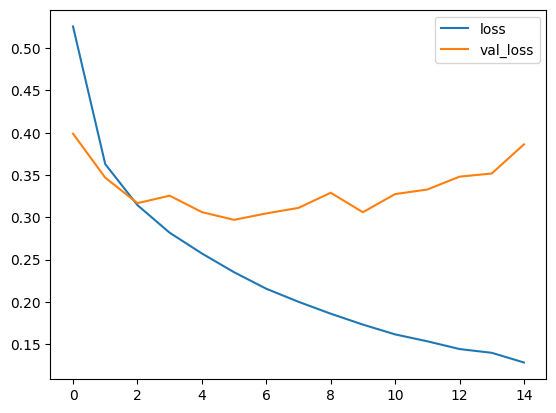

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

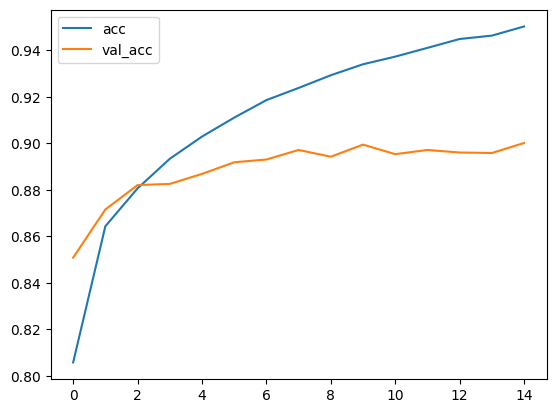

In [14]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[840   2  26  23   2   1 101   0   5   0]
 [  4 974   4  13   2   0   2   0   1   0]
 [ 13   1 879  10  35   1  59   0   2   0]
 [  9   4  16 915  27   0  28   1   0   0]
 [  0   1  85  21 807   0  86   0   0   0]
 [  0   0   0   1   0 968   0  21   0  10]
 [ 96   2  81  28  60   1 727   0   5   0]
 [  0   0   0   0   0   9   0 975   1  15]
 [  2   0   9   8   3   2   9   3 964   0]
 [  1   0   0   0   0   6   0  41   0 952]]


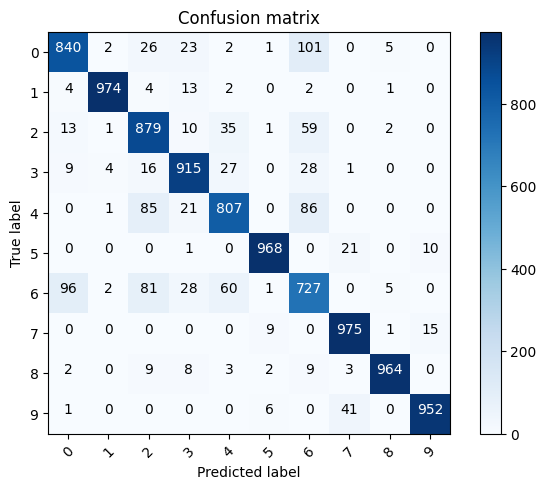

In [15]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

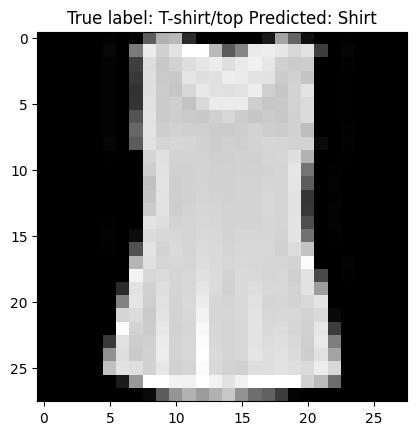

In [16]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));